In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import joypy
from joypy import joyplot

In [3]:
# For the EDA, we will use the dataset containing the tracks from all the genres
df = pd.read_csv('../../data/clean_data/electronic_dataset.csv')

In [4]:
# From the info section we can see that most of our variables are numeric, except the name of the track, 
# the artist, the album, artist genres and our target variable, the genre.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           5826 non-null   object 
 1   playlist_url       5826 non-null   object 
 2   playlist_name      5826 non-null   object 
 3   track_name         5826 non-null   object 
 4   track_popularity   5826 non-null   int64  
 5   artist_name        5826 non-null   object 
 6   album              5826 non-null   object 
 7   album_cover        5826 non-null   object 
 8   artist_genres      5826 non-null   object 
 9   artist_popularity  5826 non-null   int64  
 10  danceability       5825 non-null   float64
 11  energy             5825 non-null   float64
 12  key                5825 non-null   float64
 13  loudness           5825 non-null   float64
 14  mode               5825 non-null   float64
 15  speechiness        5825 non-null   float64
 16  acousticness       5825 

In [7]:
df.head()

track_id                                       playlist_url  \
0  3FnaCm5NYQh8prhCfPDNOV  https://open.spotify.com/playlist/7HxEKL4NF7ZK...   
1  3oJaIce9FdZyKlpQ22jxp5  https://open.spotify.com/playlist/7HxEKL4NF7ZK...   
2  50MkrUXSXsS1Q1bn95XQcm  https://open.spotify.com/playlist/7HxEKL4NF7ZK...   
3  2hJRfyYiJ8umxp1WdbeyLj  https://open.spotify.com/playlist/7HxEKL4NF7ZK...   
4  1BpG59DLyW6jZxN2PYiUA3  https://open.spotify.com/playlist/7HxEKL4NF7ZK...   

             playlist_name                        track_name  \
0  The Sound of Tech House                          Promised   
1  The Sound of Tech House                       Dark Matter   
2  The Sound of Tech House  Sleepless - Stephan Bodzin Remix   
3  The Sound of Tech House            Dubmission - 2021 Edit   
4  The Sound of Tech House                           2daBeat   

   track_popularity     artist_name                       album  \
0                42         Pig&Dan                    Promised   
1                47         Dubfire    Dark Matter / Dust & Gas   
2                48         Pan-Pot           The Other Remixes   
3                51  Anja Schneider  Dubmission (Original Edit)   
4                47       Super Flu                     Musik 3   

                                         album_cover  \
0  https://i.scdn.co/image/ab67616d0000b273510295...   
1  https://i.scdn.co/image/ab67616d0000b273d6c80d...   
2  https://i.scdn.co/image/ab67616d0000b27379a15e...   
3  https://i.scdn.co/image/ab67616d0000b2730b9874...   
4  https://i.scdn.co/image/ab67616d0000b273f2fcdb...   

                                       artist_genres  artist_popularity  ...  \
0  ['dark techno', 'microhouse', 'minimal techno'...                 41  ...   
1  ['deep minimal techno', 'minimal techno', 'tec...                 43  ...   
2  ['german techno', 'microhouse', 'minimal techn...                 40  ...   
3  ['electra', 'german house', 'german techno', '...                 44  ...   
4  ['deep euro house', 'german house', 'microhous...                 43  ...   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   1.0       0.0400      0.026700           0.87800    0.0854   0.0367   
1   1.0       0.0767      0.000703           0.88600    0.0721   0.1240   
2   1.0       0.0462      0.000220           0.81100    0.0869   0.0845   
3   1.0       0.0947      0.335000           0.89100    0.0971   0.2760   
4   0.0       0.0687      0.109000           0.00864    0.0836   0.2210   

     tempo  duration_ms  time_signature      genre  
0  124.005     562229.0             4.0  techhouse  
1  131.999     530496.0             4.0  techhouse  
2  119.991     540000.0             4.0  techhouse  
3  122.033     186885.0             4.0  techhouse  
4  120.022     329787.0             4.0  techhouse  

[5 rows x 24 columns]

In [8]:
df.describe()

track_popularity  artist_popularity  danceability       energy  \
count       5826.000000        5826.000000   5825.000000  5825.000000   
mean          29.089770          34.723138      0.588477     0.745455   
std           15.527885          14.635851      0.194156     0.257747   
min            0.000000           0.000000      0.059300     0.000020   
25%           19.000000          27.000000      0.481000     0.654000   
50%           32.000000          34.000000      0.614000     0.841000   
75%           40.000000          45.000000      0.743000     0.930000   
max           86.000000          87.000000      0.988000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  5825.000000  5825.000000  5825.000000  5825.000000   5825.000000   
mean      5.425064    -8.876623     0.555708     0.079545      0.134425   
std       3.695983     6.877443     0.496930     0.072640      0.282088   
min       0.000000   -47.216000     0.000000     0.022700      0.000002   
25%       2.000000    -9.827000     0.000000     0.042100      0.001220   
50%       6.000000    -7.116000     1.000000     0.053900      0.008990   
75%       9.000000    -5.060000     1.000000     0.082100      0.064000   
max      11.000000     1.172000     1.000000     0.865000      0.996000   

       instrumentalness     liveness      valence        tempo   duration_ms  \
count       5825.000000  5825.000000  5825.000000  5825.000000  5.825000e+03   
mean           0.567659     0.198466     0.315053   130.339429  2.851548e+05   
std            0.366956     0.171028     0.241130    24.349847  1.065315e+05   
min            0.000000     0.012100     0.022100    35.460000  6.027900e+04   
25%            0.136000     0.092900     0.111000   123.988000  2.050000e+05   
50%            0.756000     0.119000     0.258000   128.993000  2.549870e+05   
75%            0.882000     0.266000     0.475000   143.023000  3.592620e+05   
max            0.995000     0.972000     0.975000   215.088000  1.315069e+06   

       time_signature  
count     5825.000000  
mean         3.932532  
std          0.375340  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

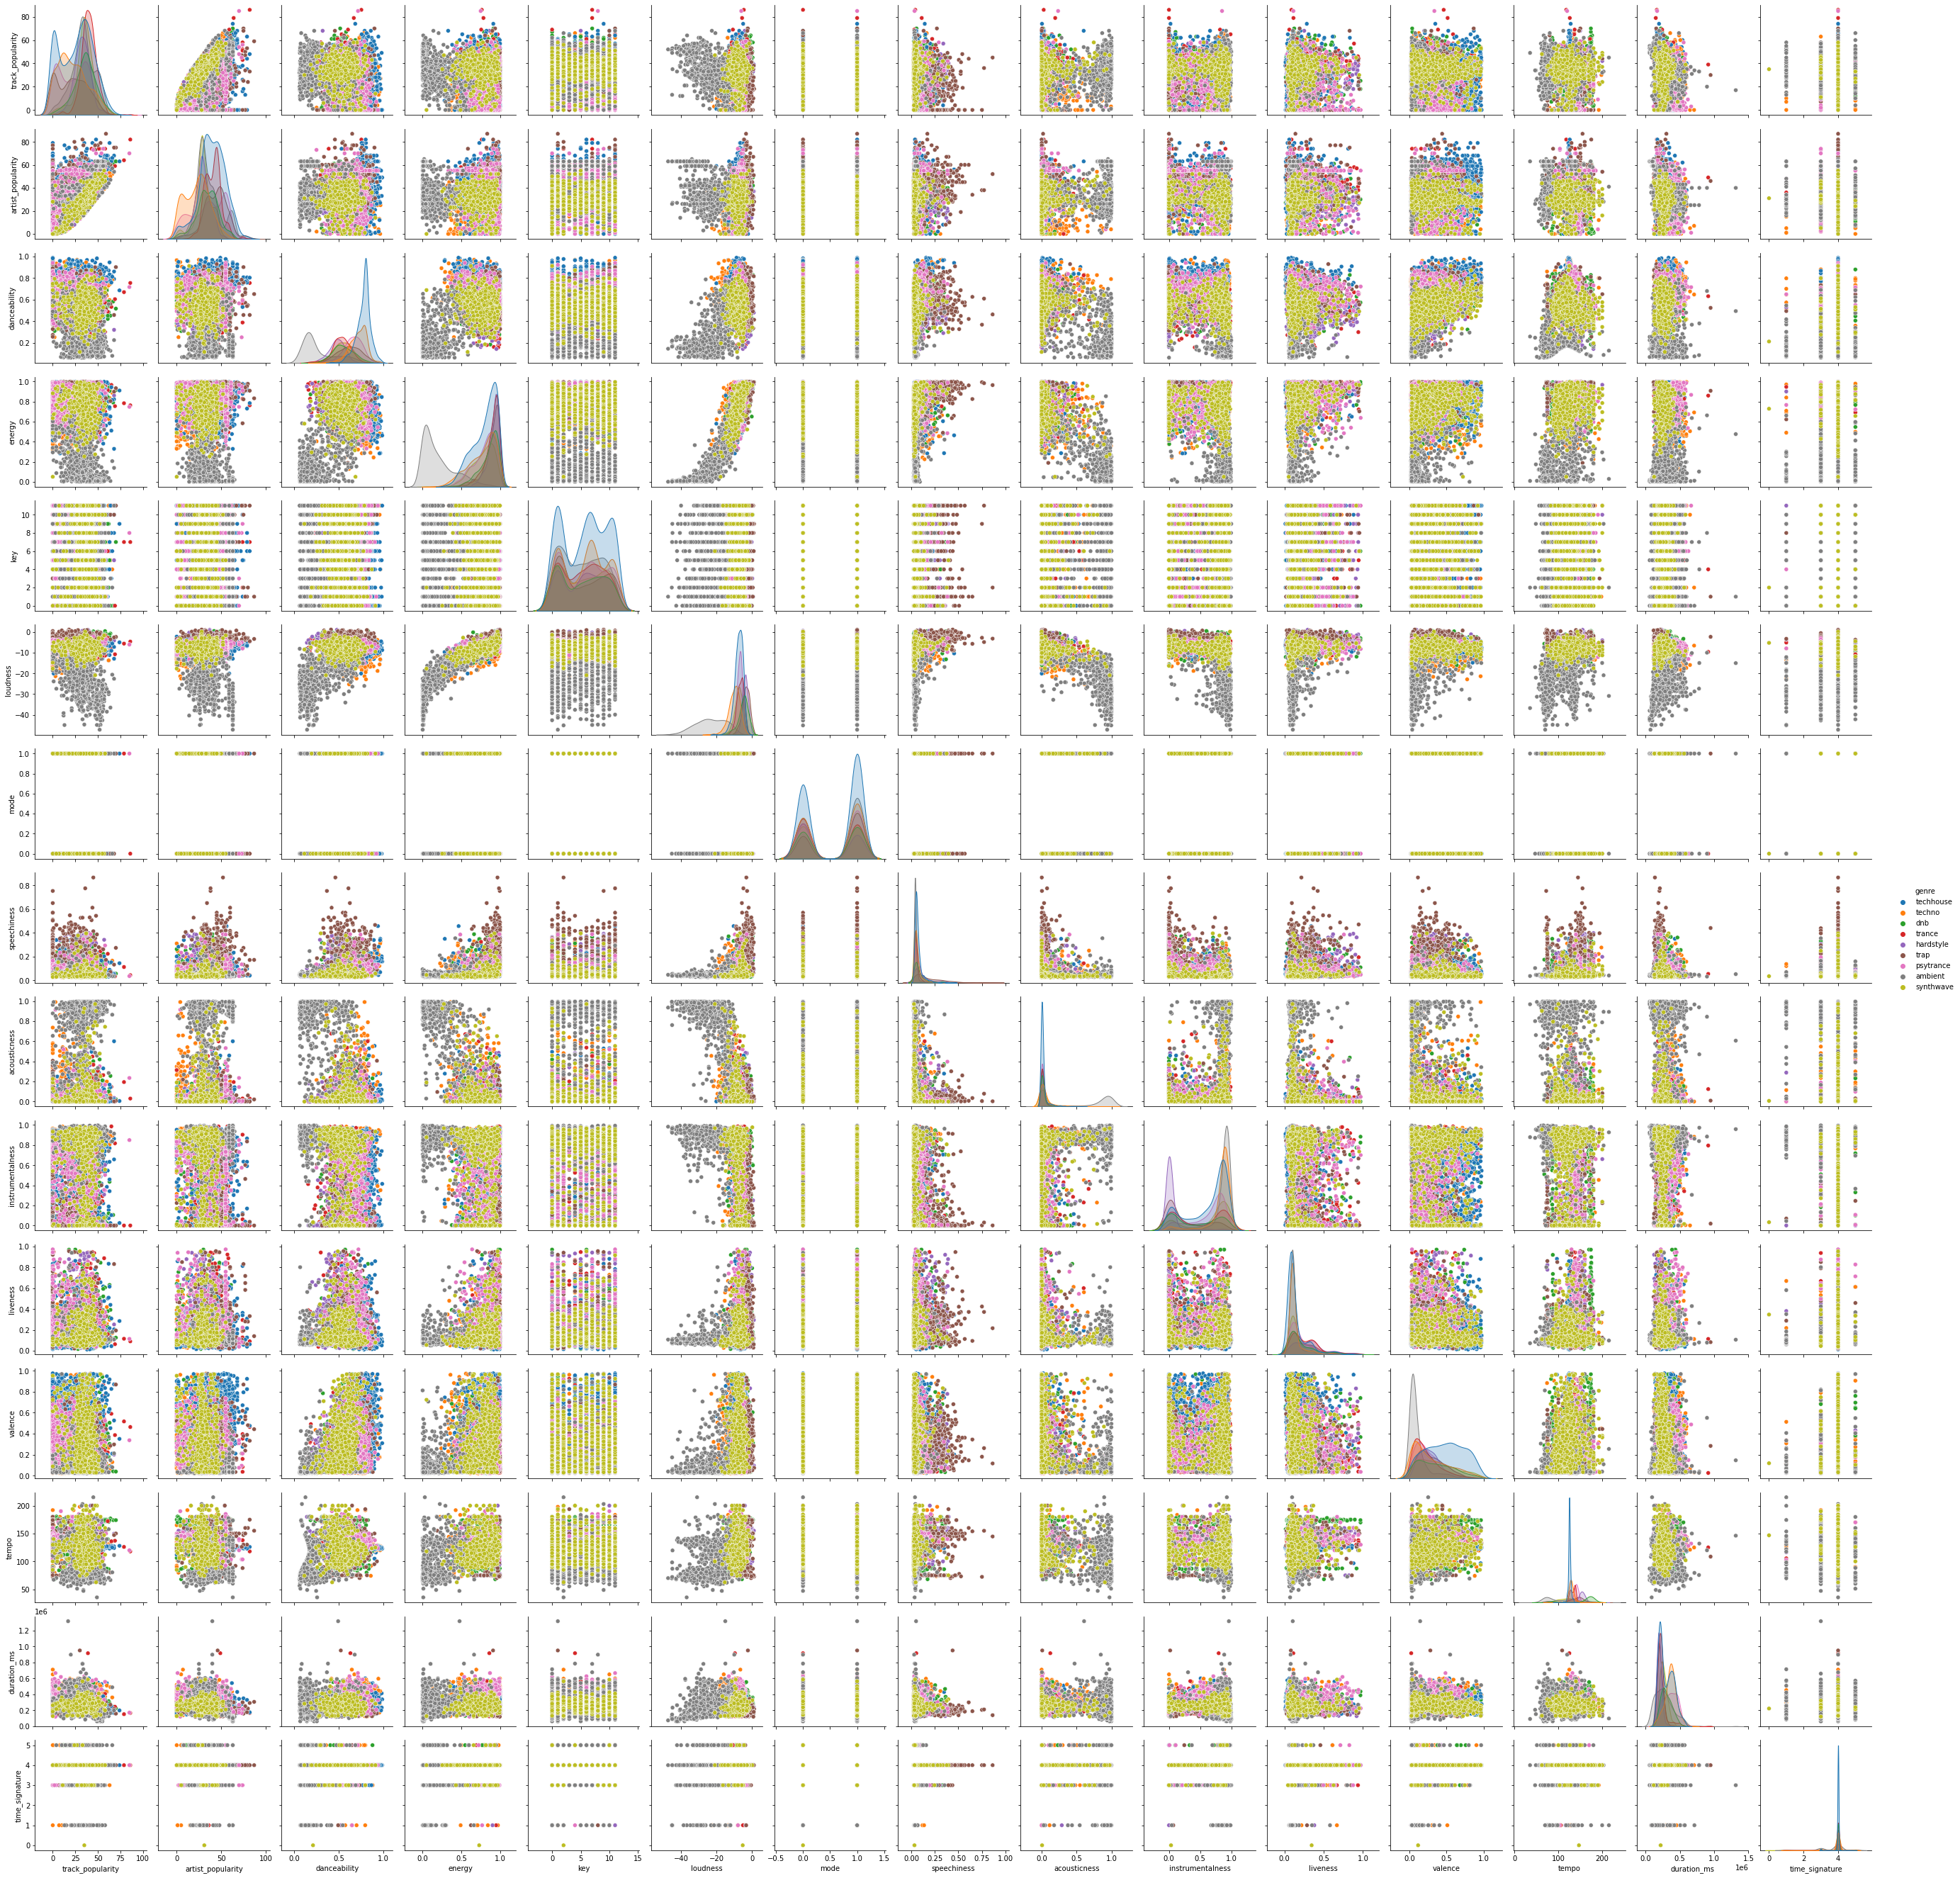

In [6]:
# As a first step we will observe the correlation between all our numeric variables, using multiple visualisations
# Pairplot

sns.pairplot(df, hue ='genre')
plt.show()

In [7]:
# Correlation
df.corr()

track_popularity  artist_popularity  danceability  \
track_popularity           1.000000           0.493107     -0.234029   
artist_popularity          0.493107           1.000000      0.023306   
danceability              -0.234029           0.023306      1.000000   
energy                    -0.107822           0.006125      0.448330   
key                        0.000488          -0.001806      0.066404   
loudness                  -0.090860           0.050450      0.485872   
mode                      -0.039588           0.011245      0.024974   
speechiness               -0.087006           0.066471      0.113713   
acousticness               0.130851           0.007515     -0.590489   
instrumentalness          -0.103744          -0.192422     -0.046951   
liveness                   0.016190           0.001966     -0.054693   
valence                   -0.114343           0.008106      0.444717   
tempo                     -0.015640          -0.035325      0.171479   
duration_ms               -0.186741          -0.275927      0.186507   
time_signature            -0.027728           0.006080      0.221797   

                     energy       key  loudness      mode  speechiness  \
track_popularity  -0.107822  0.000488 -0.090860 -0.039588    -0.087006   
artist_popularity  0.006125 -0.001806  0.050450  0.011245     0.066471   
danceability       0.448330  0.066404  0.485872  0.024974     0.113713   
energy             1.000000  0.045408  0.873130 -0.037517     0.219076   
key                0.045408  1.000000  0.042401 -0.273632     0.020275   
loudness           0.873130  0.042401  1.000000 -0.042928     0.260584   
mode              -0.037517 -0.273632 -0.042928  1.000000     0.022682   
speechiness        0.219076  0.020275  0.260584  0.022682     1.000000   
acousticness      -0.814083 -0.047773 -0.820583  0.028222    -0.150203   
instrumentalness  -0.330404 -0.029025 -0.446771  0.061900    -0.336446   
liveness           0.246111 -0.005260  0.234382 -0.036956     0.175563   
valence            0.292134  0.040387  0.275536  0.005349     0.072417   
tempo              0.464690  0.022603  0.472638 -0.052406     0.186677   
duration_ms       -0.043547  0.012460 -0.063562  0.032196    -0.145509   
time_signature     0.240783  0.030207  0.257966 -0.016208     0.041104   

                   acousticness  instrumentalness  liveness   valence  \
track_popularity       0.130851         -0.103744  0.016190 -0.114343   
artist_popularity      0.007515         -0.192422  0.001966  0.008106   
danceability          -0.590489         -0.046951 -0.054693  0.444717   
energy                -0.814083         -0.330404  0.246111  0.292134   
key                   -0.047773         -0.029025 -0.005260  0.040387   
loudness              -0.820583         -0.446771  0.234382  0.275536   
mode                   0.028222          0.061900 -0.036956  0.005349   
speechiness           -0.150203         -0.336446  0.175563  0.072417   
acousticness           1.000000          0.302581 -0.166490 -0.296119   
instrumentalness       0.302581          1.000000 -0.256095 -0.131998   
liveness              -0.166490         -0.256095  1.000000  0.006199   
valence               -0.296119         -0.131998  0.006199  1.000000   
tempo                 -0.431894         -0.242095  0.191781  0.121969   
duration_ms           -0.068183          0.351084 -0.130054 -0.055294   
time_signature        -0.255655         -0.083426  0.039534  0.127286   

                      tempo  duration_ms  time_signature  
track_popularity  -0.015640    -0.186741       -0.027728  
artist_popularity -0.035325    -0.275927        0.006080  
danceability       0.171479     0.186507        0.221797  
energy             0.464690    -0.043547        0.240783  
key                0.022603     0.012460        0.030207  
loudness           0.472638    -0.063562        0.257966  
mode              -0.052406     0.032196       -0.016208  
speechiness        0.186677    -0.145509

<AxesSubplot:>

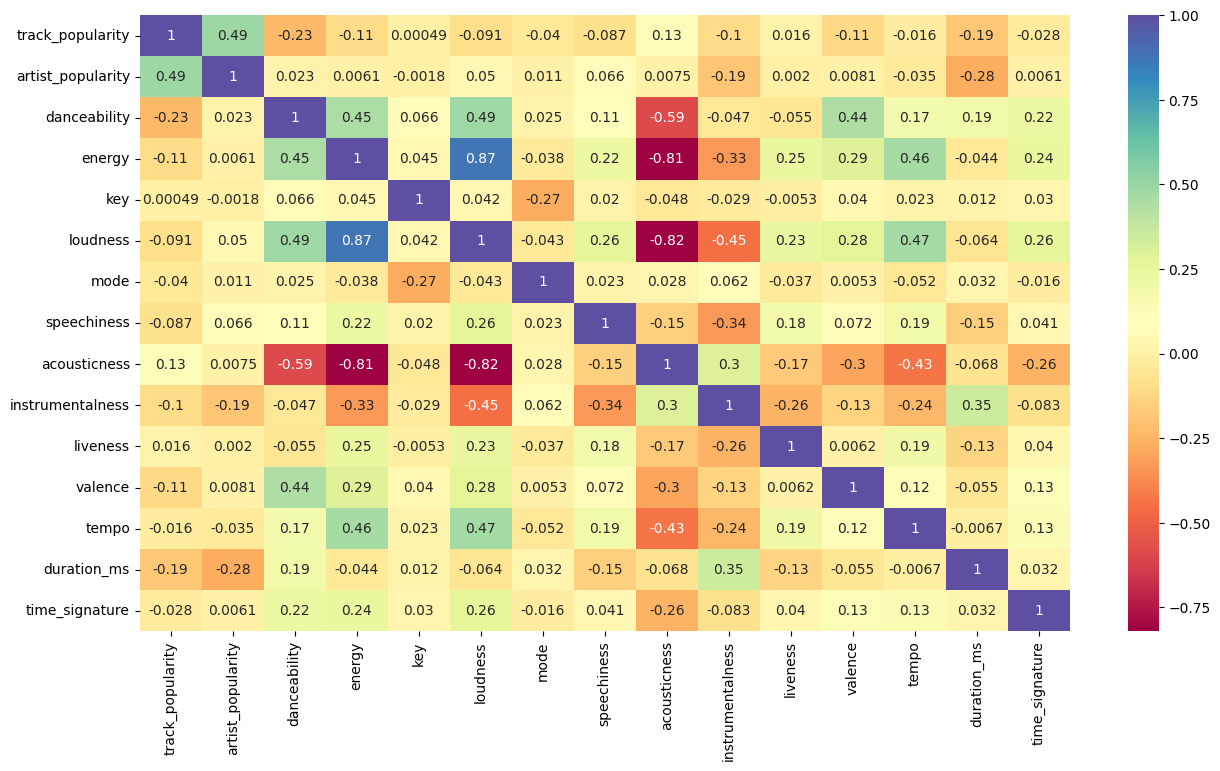

In [8]:
# Heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="Spectral")

<AxesSubplot:>

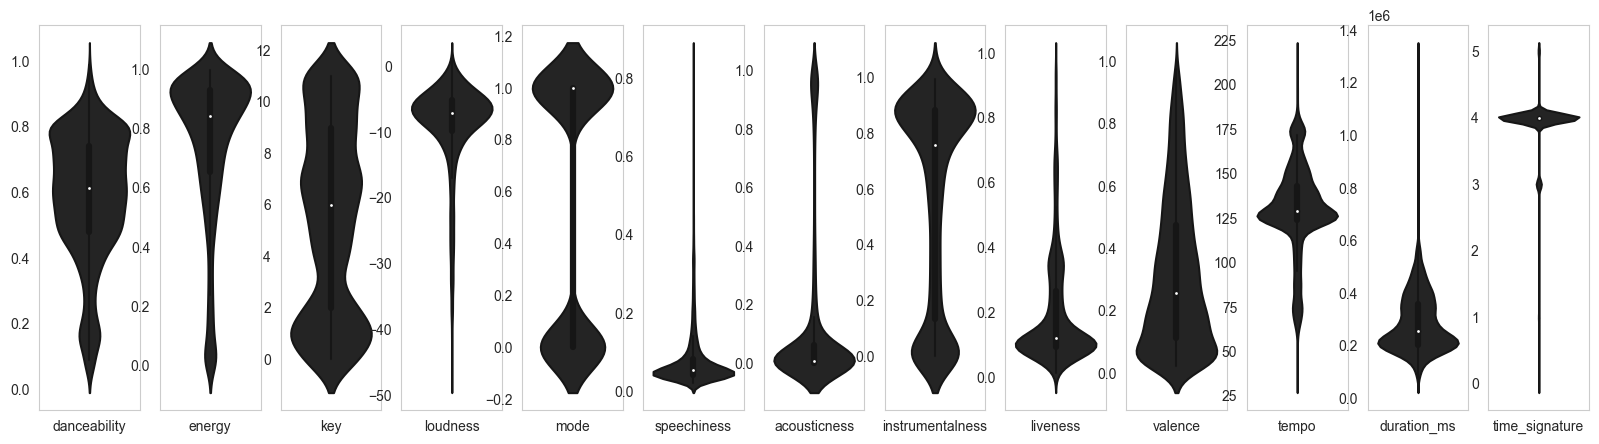

In [10]:
# First we will observe the distribution of the audio features within our dataset

fig, axs = plt.subplots(ncols=13, figsize=(20,5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("gist_gray")
sns.violinplot(data=df[['danceability']], ax=axs[0], yticklabels=False)
sns.violinplot(data=df[['energy']], ax=axs[1])
sns.violinplot(data=df[['key']], ax=axs[2])
sns.violinplot(data=df[['loudness']], ax=axs[3])
sns.violinplot(data=df[['mode']], ax=axs[4])
sns.violinplot(data=df[['speechiness']], ax=axs[5])
sns.violinplot(data=df[['acousticness']], ax=axs[6])
sns.violinplot(data=df[['instrumentalness']], ax=axs[7])
sns.violinplot(data=df[['liveness']], ax=axs[8])
sns.violinplot(data=df[['valence']], ax=axs[9])
sns.violinplot(data=df[['tempo']], ax=axs[10])
sns.violinplot(data=df[['duration_ms']], ax=axs[11])
sns.violinplot(data=df[['time_signature']], ax=axs[12])

<AxesSubplot:xlabel='artist_popularity', ylabel='track_popularity'>

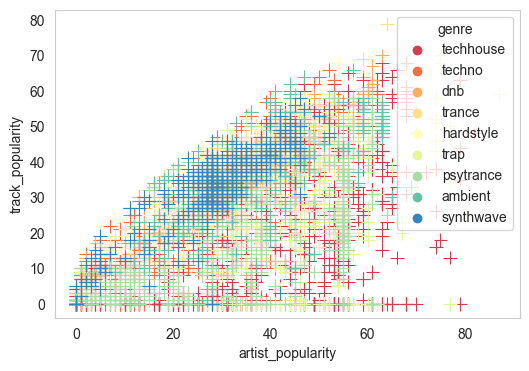

In [57]:
# Since we have seen a correlation between the popularity of the artist and the popularity of the track, 
# we have plot them and observe the distribution. 
# In the plot we can see that the section where the track popularity is high, and the artist popularity is low,
# is empty, so all the songs with high popularity also have high popularity in the artist.

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="artist_popularity", y="track_popularity", s=100, color=".1", marker="+", hue='genre', palette='Spectral')

<AxesSubplot:xlabel='loudness', ylabel='tempo'>

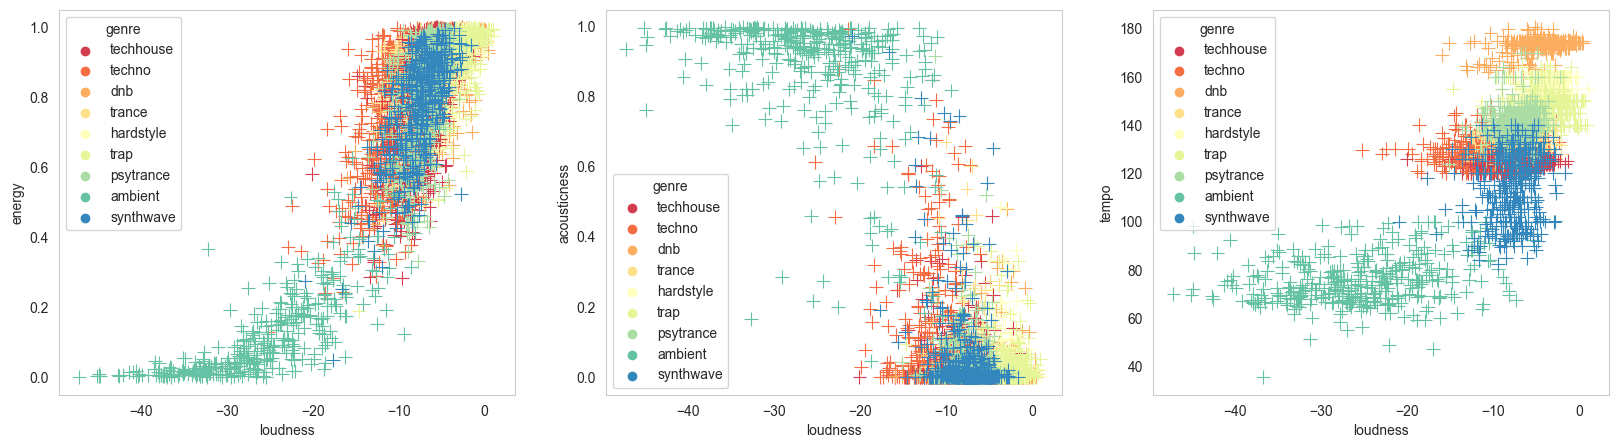

In [14]:
# The loudness has hight correlation between other variables, like the energy, the accousticness and the tempo.
# From this plots, we can already see how genres are distributed within the data.

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="loudness", y="energy", s=100, hue='genre', marker="+", ax=axs[0], palette='Spectral')
sns.scatterplot(data=df, x="loudness", y="acousticness", s=100, hue='genre', marker="+", ax=axs[1], palette='Spectral')
sns.scatterplot(data=df, x="loudness", y="tempo", s=100, hue='genre', marker="+", ax=axs[2], palette='Spectral')

<AxesSubplot:xlabel='loudness', ylabel='tempo'>

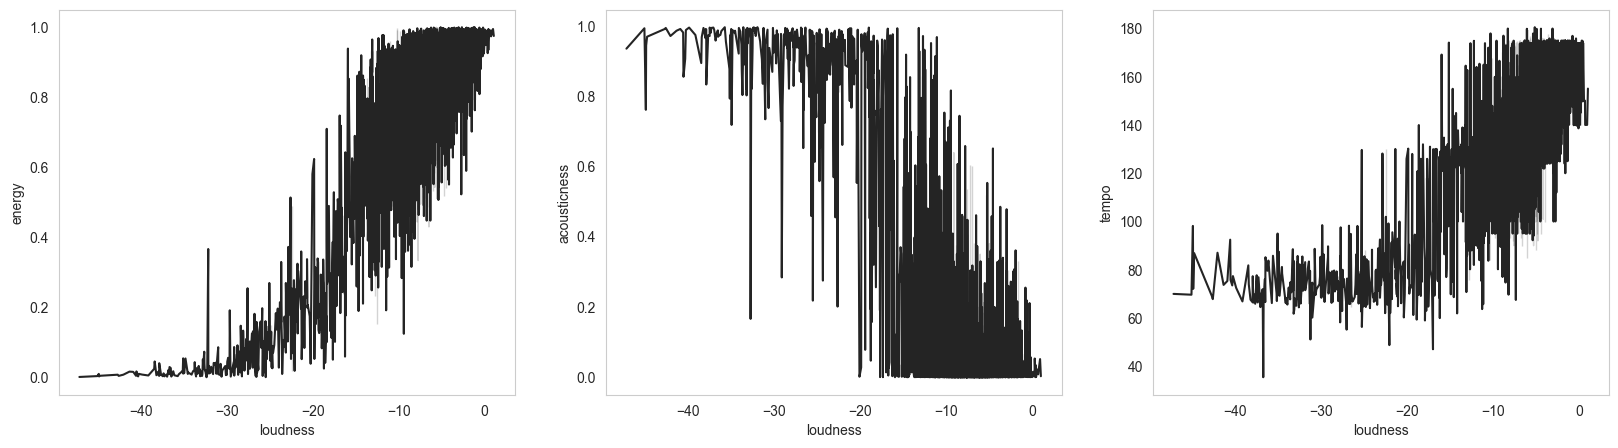

In [15]:
# In order to better observe the correlation, we have plotted lineplots, and from them we can see that:
# - the energy and the tempo have positive correlation with the loudness, the higher the loudness the higher are the 
# - the accousticness has a negative correlation with the loudness, the higher the loudness the lower the acousticness.

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="loudness", y="energy", ax=axs[0], palette='Spectral')
sns.lineplot(data=df, x="loudness", y="acousticness", ax=axs[1], palette='Spectral')
sns.lineplot(data=df, x="loudness", y="tempo", ax=axs[2], palette='Spectral')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

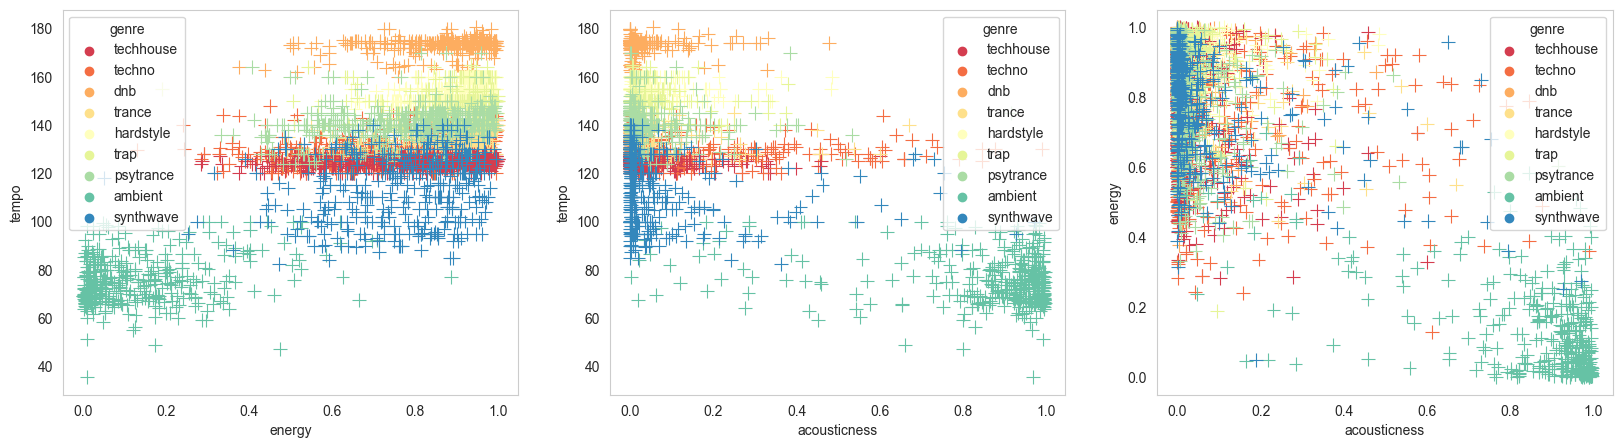

In [17]:
# Other variables which also had correlation were the energy, the acousticness and the tempo.
# We can see again that, when we plot the tempo, we can clearly identify the diferent genres. We also observe a 
# a positive correlation within the energy and the tempo, and a negative correlation in the other variables

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="energy", y="tempo", s=100, hue='genre', marker="+", ax=axs[0], palette='Spectral')
sns.scatterplot(data=df, x="acousticness", y="tempo", s=100,  hue='genre', marker="+", ax=axs[1], palette='Spectral')
sns.scatterplot(data=df, x="acousticness", y="energy", s=100,  hue='genre', marker="+", ax=axs[2], palette='Spectral')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

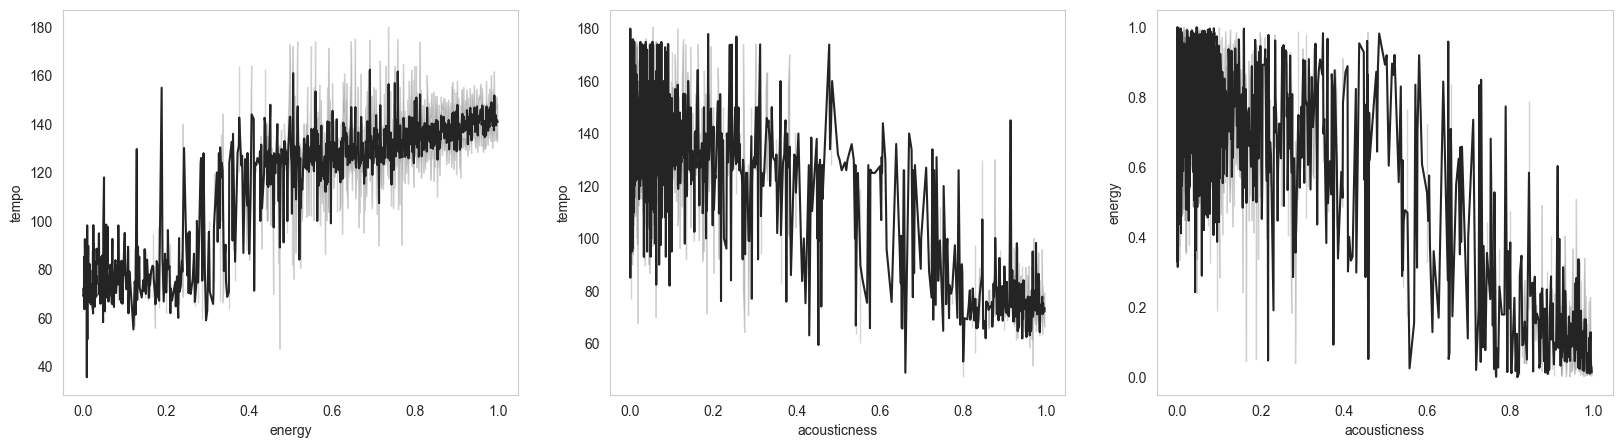

In [ ]:
# In this graphs we can better see the correlation

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="energy", y="tempo", ax=axs[0])
sns.lineplot(data=df, x="acousticness", y="tempo", ax=axs[1])
sns.lineplot(data=df, x="acousticness", y="energy", ax=axs[2])

<AxesSubplot:xlabel='acousticness', ylabel='danceability'>

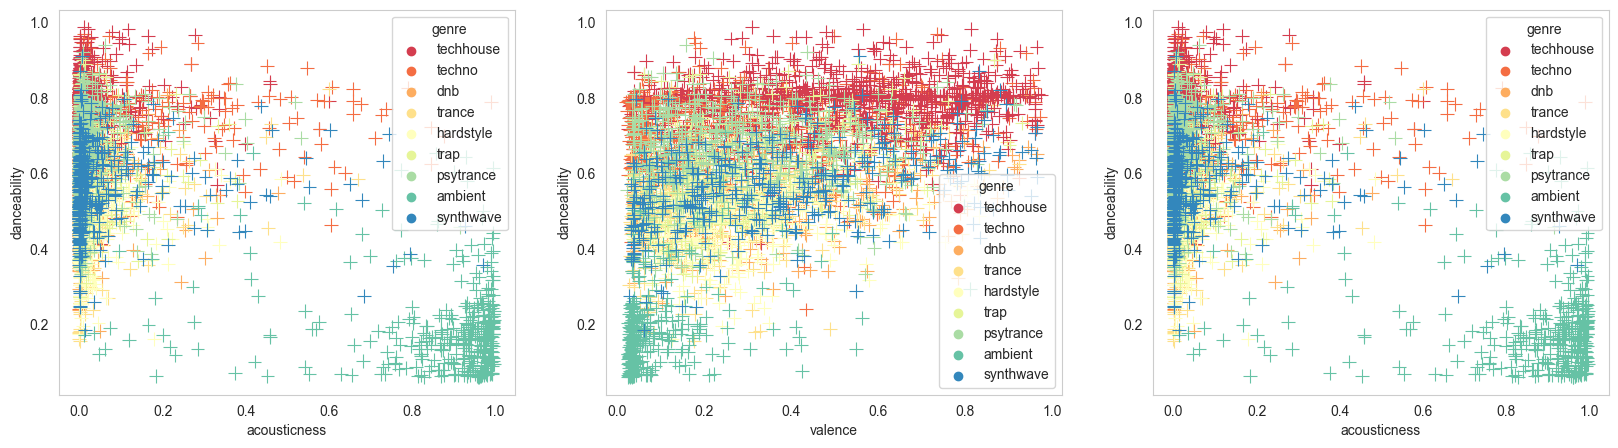

In [18]:
# Last, we have plotted other variables with correlation. Even if we can see a slight correlation, the biggest 
# difference we see is in the distribution of the genres, mostly the ambient

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="acousticness", y="danceability", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[0])
sns.scatterplot(data=df, x="valence", y="danceability", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[1])
sns.scatterplot(data=df, x="acousticness", y="danceability", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[2])

<AxesSubplot:xlabel='acousticness', ylabel='danceability'>

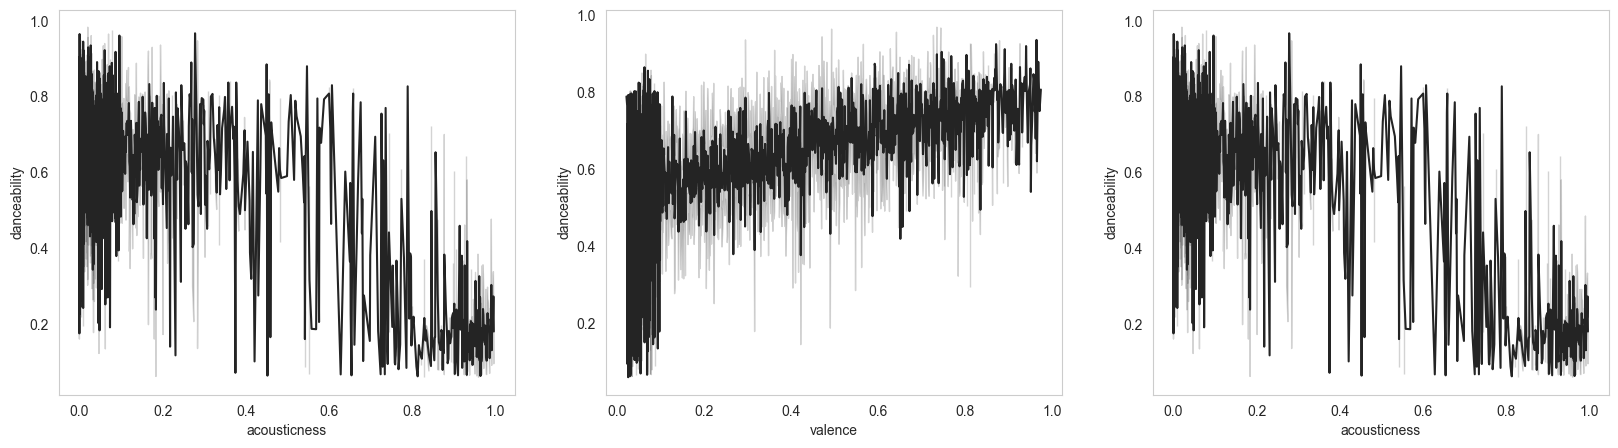

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="acousticness", y="danceability", ax=axs[0])
sns.lineplot(data=df, x="valence", y="danceability", ax=axs[1])
sns.lineplot(data=df, x="acousticness", y="danceability", ax=axs[2])

<AxesSubplot:xlabel='genre', ylabel='count'>

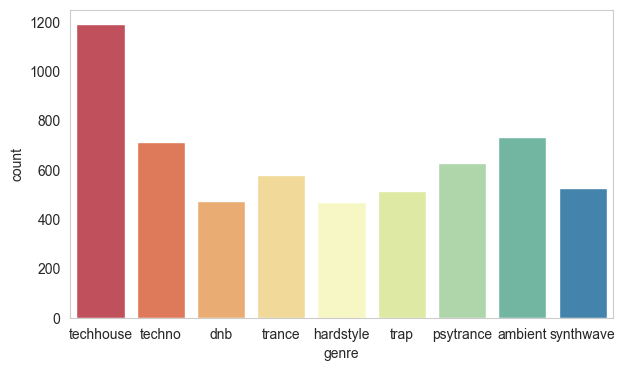

In [12]:
# Since our goal is to predict the genre, we will now observe all the variables divided by genre
# In this graph we can see how the data in the dataset is distributed among the genres

plt.figure(figsize=(7,4))
sns.countplot(x=df["genre"], color='.1', palette='Spectral')

<Figure size 2000x2000 with 0 Axes>

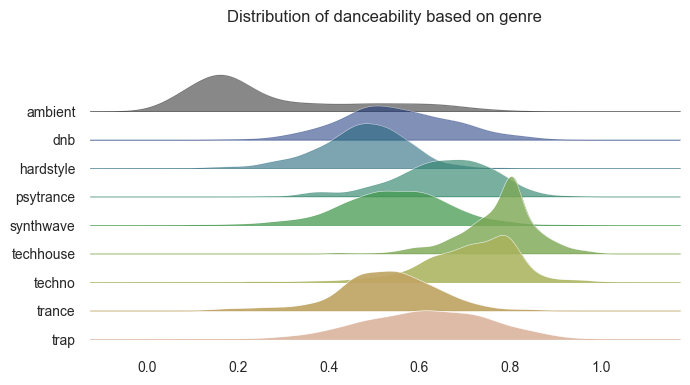

In [14]:
# We have chosen a joyplot for our following visualizations, as it clearly shows the variation
# in the distribution within the genres

plt.figure(figsize=(20,20))
joyplot(df, by = 'genre', column = 'danceability', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of danceability based on genre', linewidth=0.4, linecolor='white')
plt.show()

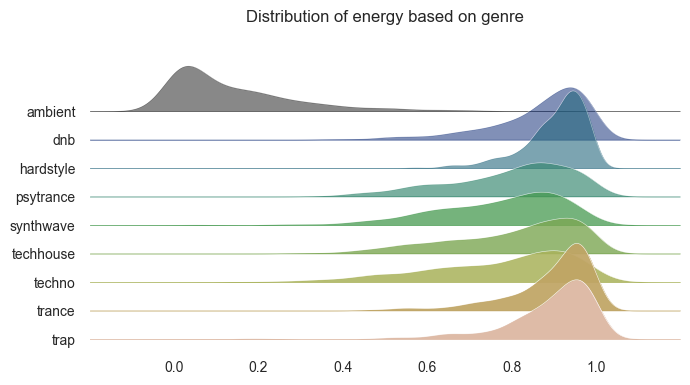

In [33]:
joyplot(df, by = 'genre', column = 'energy', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of energy based on genre', linewidth=0.4, linecolor='white')
plt.show()

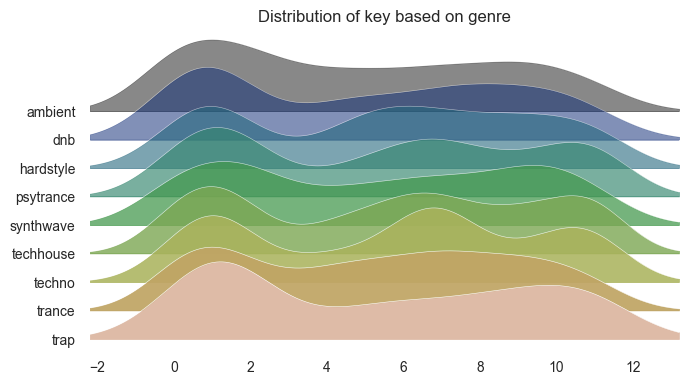

In [35]:
joyplot(df, by = 'genre', column = 'key', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of key based on genre', linewidth=0.4, linecolor='white')
plt.show()

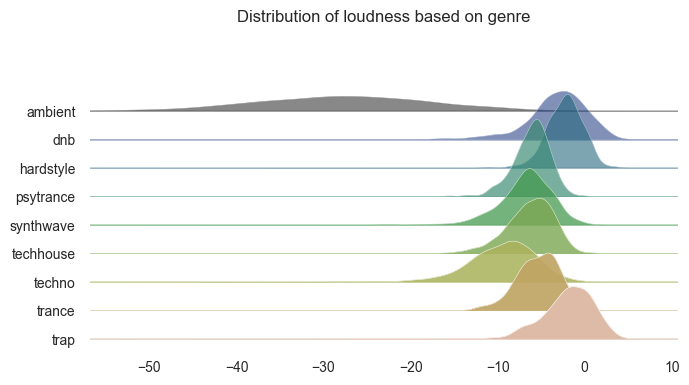

In [38]:
fig, axes = joyplot(df, by = 'genre', column = 'loudness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of loudness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-50,7]) 
plt.show()

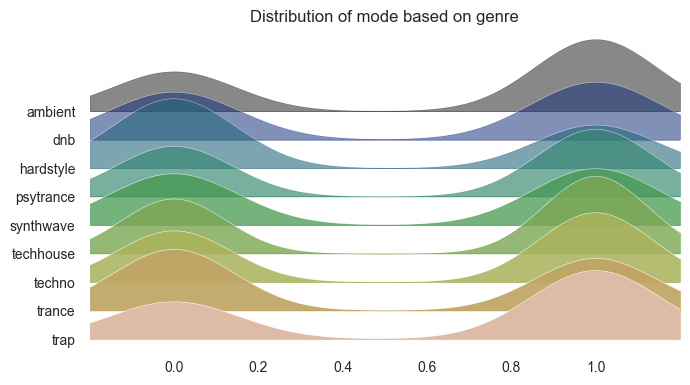

In [39]:
fig, axes = joyplot(df, by = 'genre', column = 'mode', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of mode based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.2]) 
plt.show()

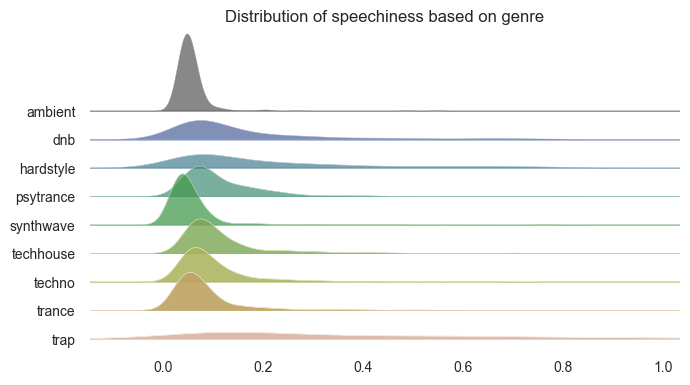

In [40]:
fig, axes = joyplot(df, by = 'genre', column = 'speechiness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of speechiness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.05,0.5]) 
plt.show()

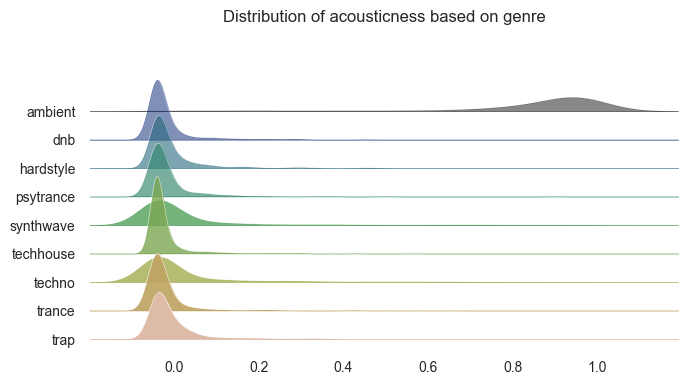

In [48]:
fig, axes = joyplot(df, by = 'genre', column = 'acousticness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of acousticness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.15,1.2]) 
plt.show()

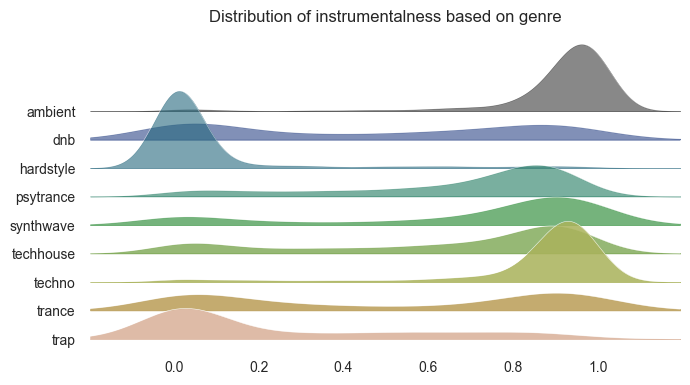

In [49]:
fig, axes = joyplot(df, by = 'genre', column = 'instrumentalness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of instrumentalness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.15]) 
plt.show()

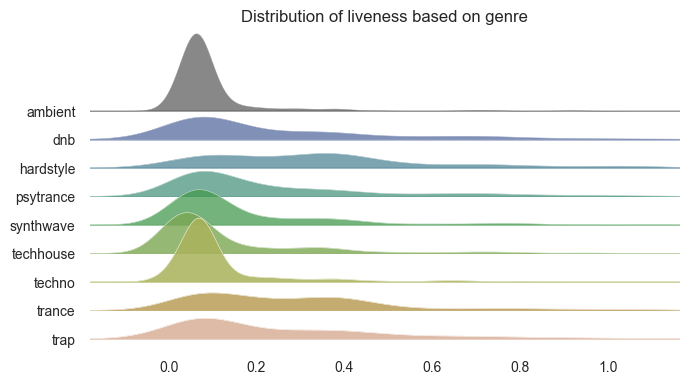

In [50]:
fig, axes = joyplot(df, by = 'genre', column = 'liveness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of liveness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.1,1]) 
plt.show()

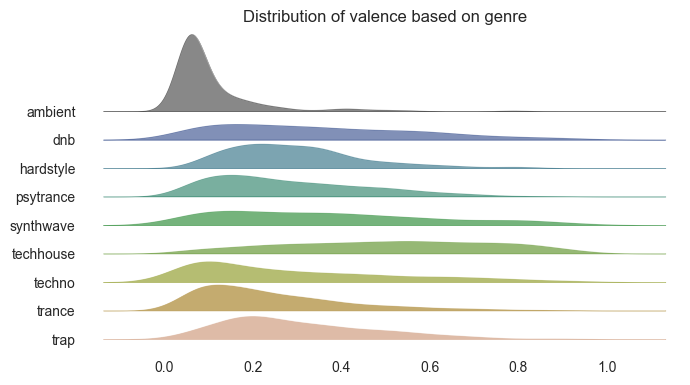

In [51]:
fix, axes = joyplot(df, by = 'genre', column = 'valence', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of valence based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.2])  
plt.show()

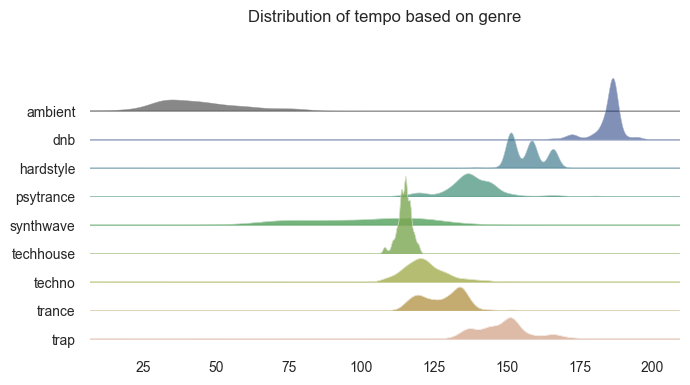

In [53]:
fig, axes = joyplot(df, by = 'genre', column = 'tempo', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of tempo based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([50,190])  
plt.show()

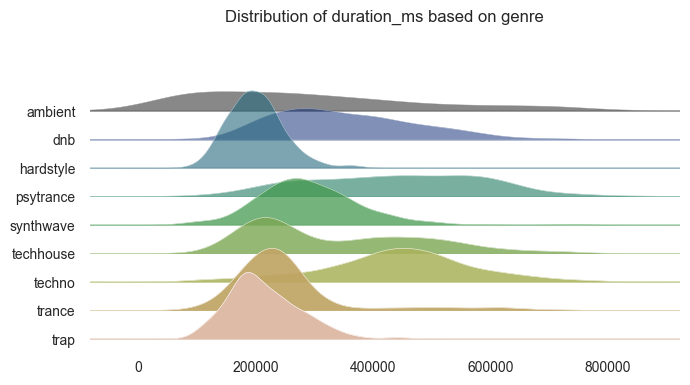

In [54]:
fig, axes = joyplot(df, by = 'genre', column = 'duration_ms', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of duration_ms based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([1000,700000])  
plt.show()

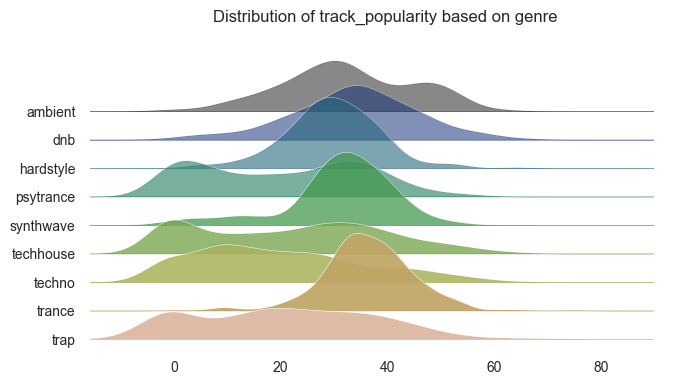

In [55]:
fig, axes = joyplot(df, by = 'genre', column = 'track_popularity', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of track_popularity based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-15,100])  
plt.show()

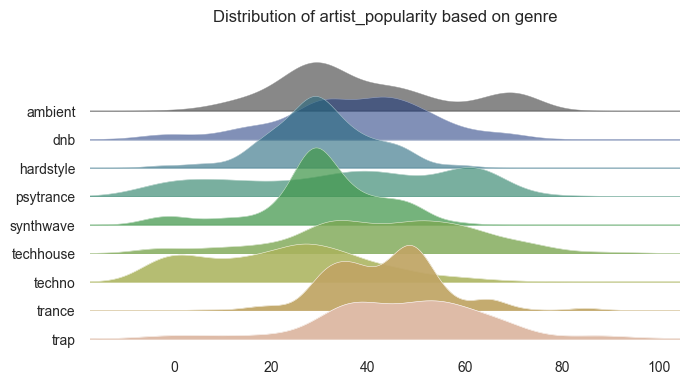

In [56]:
fig, axes = joyplot(df, by = 'genre', column = 'artist_popularity', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of artist_popularity based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-10,90])  
plt.show()